# Analysing the dataset

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
df = pd.read_csv('/content/drive/MyDrive/datasets/csv/medical_QnA.csv')

## Dataset analysis

In [20]:
df.head()

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [21]:
df

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."
...,...,...,...
16402,symptoms,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...
16403,information,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...
16404,symptoms,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...
16405,treatment,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...


In [22]:
df.describe()

,qtype,Question,Answer
count,16407,16407,16407
unique,16,14979,15817
top,information,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...
freq,4535,20,348


## Data visualization

Visualizaing distribution of question types

<ipython-input-23-729b6ace32a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='qtype', data=df, palette='viridis')


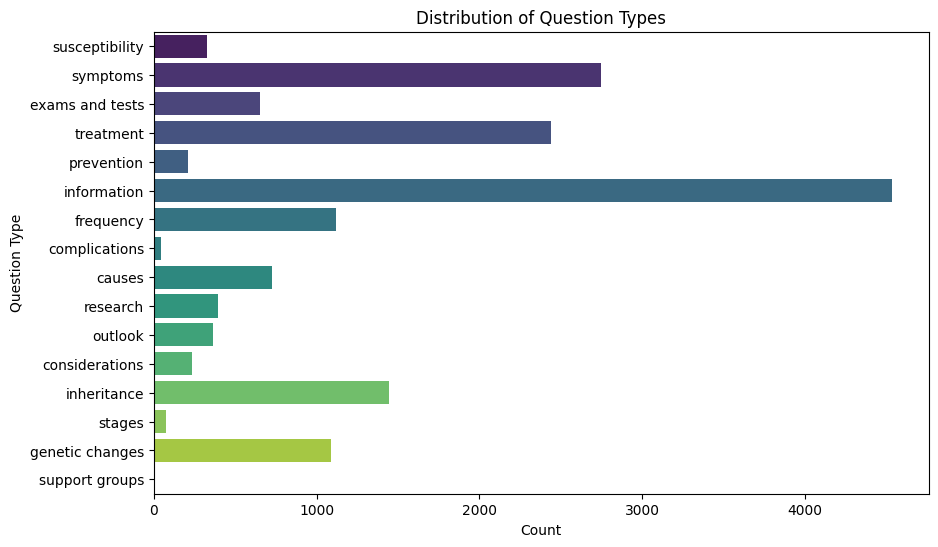

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='qtype', data=df, palette='viridis')
plt.title('Distribution of Question Types')
plt.xlabel('Count')
plt.ylabel('Question Type')
plt.show()

Word cloud of questions

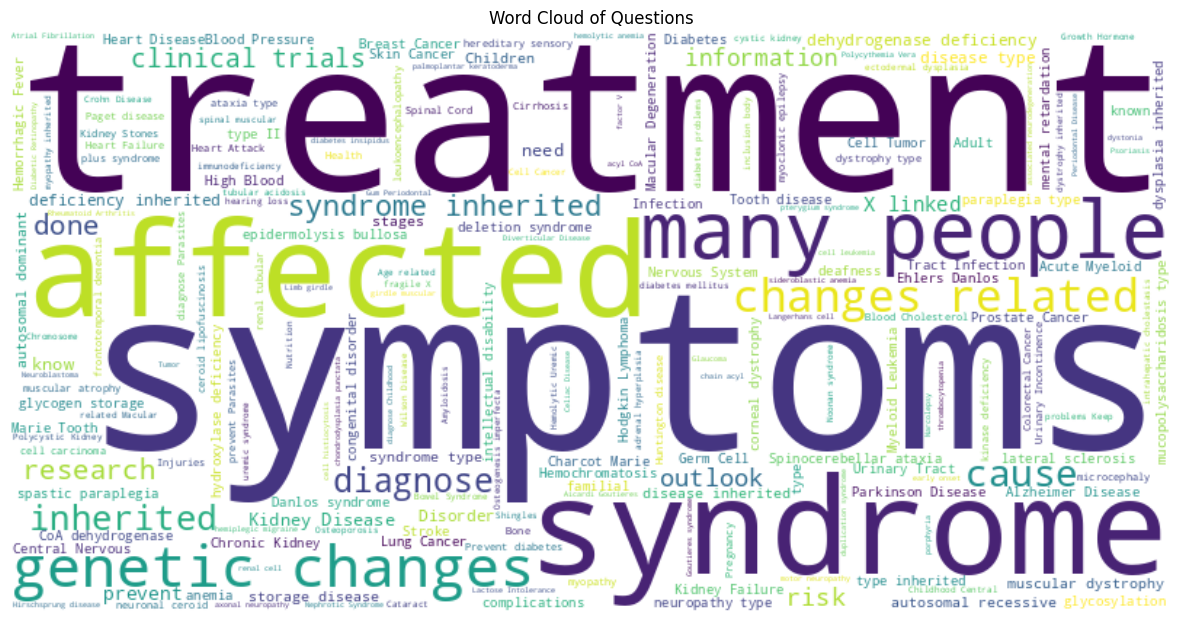

In [25]:
text = " ".join(question for question in df.Question)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions')
plt.show()

Word cloud of answers

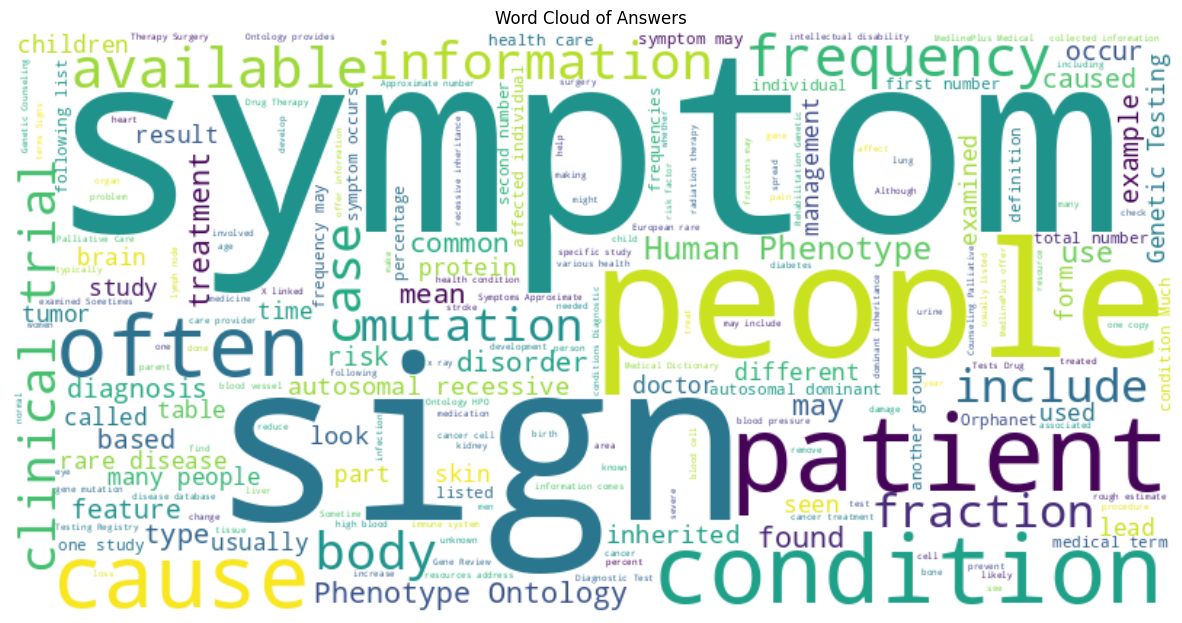

In [26]:
text = " ".join(answer for answer in df.Answer)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Answers')
plt.show()

Answer length distribution

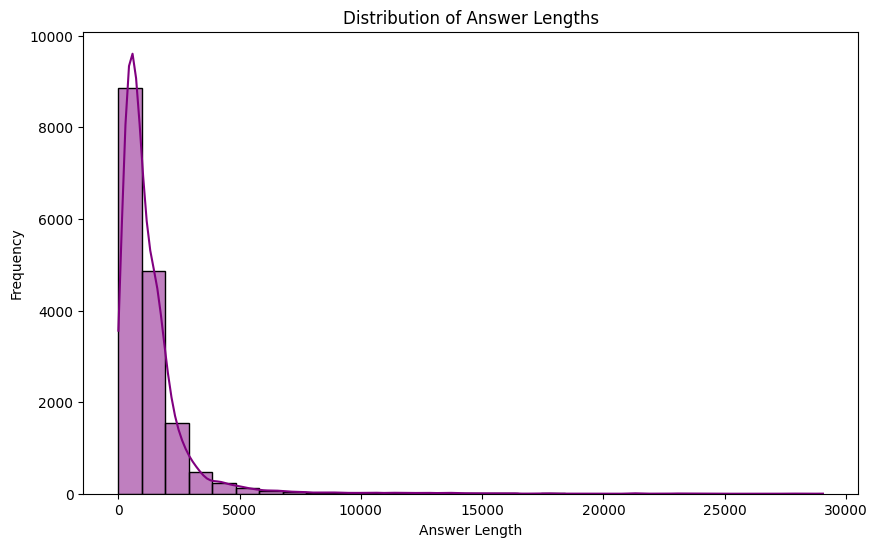

In [28]:
df['answer_length'] = df['Answer'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['answer_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.show()

Question Length Distribution

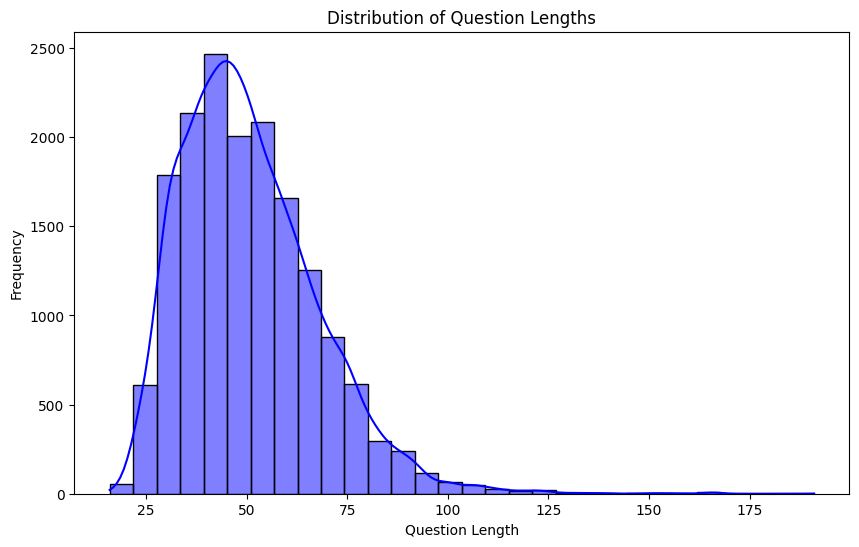

In [29]:
df['question_length'] = df['Question'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['question_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

Box Plot of Answer Lengths by Question Type

<ipython-input-30-f9698efc7dc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='qtype', y='answer_length', data=df, palette='viridis')


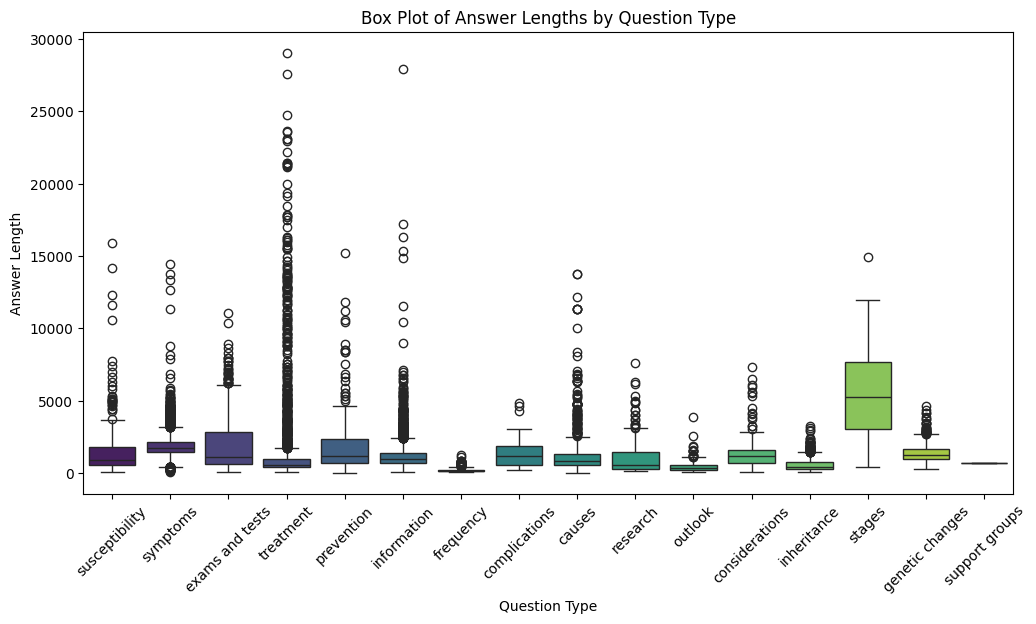

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='qtype', y='answer_length', data=df, palette='viridis')
plt.title('Box Plot of Answer Lengths by Question Type')
plt.xlabel('Question Type')
plt.ylabel('Answer Length')
plt.xticks(rotation=45)
plt.show()

## Data preparation for model

In [31]:
df = df.drop(columns=['qtype'])

In [32]:
df

,Question,Answer,answer_length,question_length
0,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...,467,56
1,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...,2558,61
2,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...,708,56
3,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos...",653,52
4,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen...",446,64
...,...,...,...,...
16402,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...,1820,83
16403,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...,993,37
16404,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...,1478,48
16405,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...,658,51


In [33]:
df.rename(columns={'Question': 'question'}, inplace=True)
df.rename(columns={'Answer': 'answer'}, inplace=True)

In [34]:
df.head()

,question,answer,answer_length,question_length
0,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...,467,56
1,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...,2558,61
2,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...,708,56
3,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos...",653,52
4,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen...",446,64


In [35]:
json_data = df.to_json(orient='records')

In [36]:
output_file_path = '/content/drive/MyDrive/datasets/json/medical_QnA.json'
with open(output_file_path, 'w') as json_file:
    json_file.write(json_data)

print(f"CSV column renamed and data saved to {output_file_path}.")

CSV column renamed and data saved to /content/drive/MyDrive/datasets/json/medical_QnA.json.


# Json file uploaded to hugging face for model training